In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
import pandas as pd
import sklearn
import sklearn.svm
import sklearn.metrics
from sklearn.cross_validation import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import generative_classifiers
import neural_network
import decision_tree
import Svm
from sklearn.linear_model import ElasticNet

from sklearn.neighbors import KernelDensity
from sklearn.grid_search import GridSearchCV

/home/ariel/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


##Download the data

In [3]:
star_file = np.load("data/RR_Lyrae_data.npz")
star_colors, star_class = star_file['arr_0'], star_file['arr_1']

##Stack the data and store it in a pandas dataframe

In [4]:
stacked = np.hstack((star_colors, star_class.reshape(star_class.shape[0], 1)))
col_names = ['u-g', 'g-r', 'r-i', 'i-z', 'class']
star_df = pd.DataFrame(stacked, columns=col_names)

##Plot the enitre dataset with a pairplot from seaborn

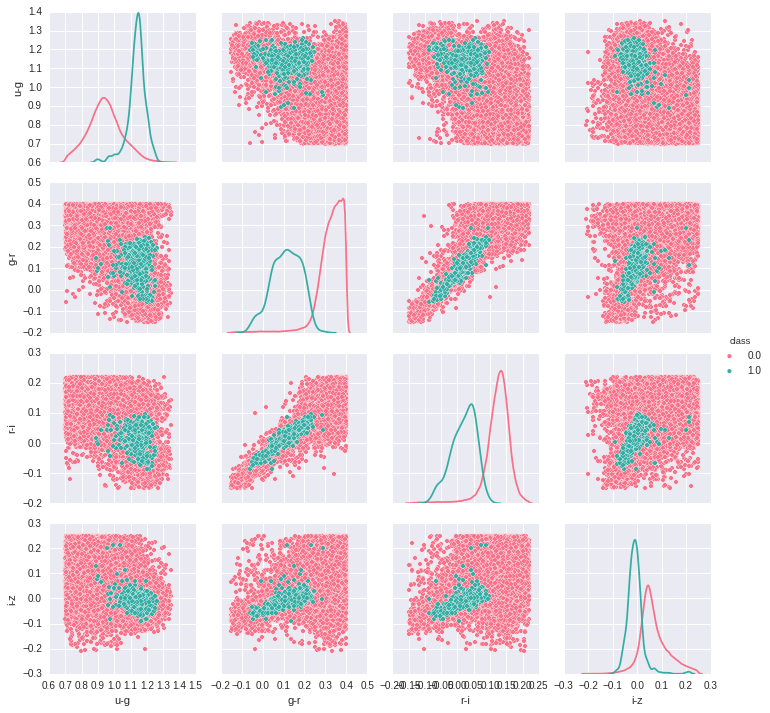

In [5]:
star_pairplot = sns.pairplot(star_df, hue='class', vars=col_names[:-1], diag_kind="kde", palette='husl')
star_pairplot.savefig("rr_lyrae_vs_std_star.png")

##Divide the data into train and test sets

In [6]:
colors_train, colors_test, labels_train, labels_test = train_test_split(star_colors, star_class, 
                                                                        test_size=0.25, random_state=13)

##Function to compute results

In [7]:
def compute_results(y_true, y_pred):
    fpr, tpr, thresholds_roc = sklearn.metrics.roc_curve(y_true, y_pred, pos_label=1)
    precision_p, recall_p, thresholds_pr = sklearn.metrics.precision_recall_curve(y_true, y_pred, pos_label=1)
    
    y_hard_decisions = np.round(y_pred)
    
    precision = sklearn.metrics.precision_score(y_true, y_hard_decisions)
    recall = sklearn.metrics.recall_score(y_true, y_hard_decisions)
    
    f1 = sklearn.metrics.f1_score(y_true, y_hard_decisions)
    roc_score = sklearn.metrics.roc_auc_score(y_true, y_hard_decisions)
    accuracy = sklearn.metrics.accuracy_score(y_true, y_hard_decisions)
    
    results = {'roc': [fpr, tpr, thresholds_roc],
               'pr': [precision_p, recall_p, thresholds_pr],
               'scores': [precision, recall, f1, roc_score, accuracy]}
    return results

##Functions to train models

In [8]:
def logistic_regression_classification(x_train, y_train, x_test, y_test):
    log_regr = LogisticRegression(class_weight='auto')
    log_regr.fit(x_train, y_train)
    predicted_proba = log_regr.predict_proba(x_test)[:, 1]
    return compute_results(y_test, predicted_proba)

In [9]:
def svm_classification(x_train, y_train, x_test, y_test):
    svm = SVC(kernel='linear', class_weight='auto', probability=True)
    svm.fit(x_train, y_train)
    predicted_proba = svm.predict_proba(x_test)[:, 1]
    return compute_results(y_test, predicted_proba)

In [10]:
def decision_Tree_classification(x_train, y_train, x_test, y_test):
    decision = decision_tree.DecisionTreeClassifier(max_depth = 12)
    decision.fit(x_train, y_train) 
    predictions = decision.predict(x_test)
    
    return compute_results(y_test, predictions)

In [11]:
def knn_classification(x_train, y_train, x_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(x_train, y_train)
    predicted_proba = knn.predict_proba(x_test)[:, 1]
    return compute_results(y_test, predicted_proba)

In [12]:
def random_forest_classification(x_train, y_train, x_test, y_test):
    rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2)
    rf.fit(x_train, y_train)
    predicted_proba = rf.predict_proba(x_test)[:, 1]
    return compute_results(y_test, predicted_proba)

In [13]:
def neurual_network_classification(x_train, y_train, x_test, y_test):
    predicted_proba = neural_network.run_network(x_train, y_train, x_test, y_test, 2, [20, 15], 1000, .01, 10)
    return compute_results(y_test, predicted_proba)

In [14]:
def naive_bayes_classification(x_train, y_train, x_test, y_test):
    predicted_proba = generative_classifiers.run_naive_bayes(x_train, y_train, x_test, y_test)
    return compute_results(y_test, predicted_proba)

In [15]:
def boosted_dt_classification(x_train, y_train, x_test, y_test):
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=.03, max_depth=8, random_state=0)
    clf.fit(x_train, y_train)
    predicted = clf.predict(x_test)
    return compute_results(y_test, predicted)

##Function to run the models and plot the results

In [16]:
def run_models(x_train, y_train, x_test, y_test):
    results = dict()
    
    #RUN Models
    
    #Logistic Regression
    logistic_results = logistic_regression_classification(x_train, y_train, x_test, y_test)
    results['Log Reg'] = logistic_results
    
    # SVM Basically the same as Logistic Regression and takes a while to train
#     svm_results = svm_classification(x_train, y_train, x_test, y_test)
#     results['SVM'] = svm_results

    #SVM
    #svmClassifier = Svm.linearSVM()
    #svmClassifier.fit(x_train, y_train)
    #results['Linear SVM'] = compute_results(y_test, svmClassifier.predict(x_test))
    
    #Elastic Net
    #eNet = ElasticNet()
    #eNet.fit(x_train, y_train)
    #results['Elastic Net'] = compute_results(y_test, eNet.predict(x_test))
    
    
    #Decision Tree
    d_tree_resuts = decision_Tree_classification(x_train, y_train, x_test, y_test)
    results['D Tree'] = d_tree_resuts
    
    boosted_d_tree_resuts = boosted_dt_classification(x_train, y_train, x_test, y_test)
    results['Boosted D Tree'] = boosted_d_tree_resuts
    
    #KNN
    knn_resuts = knn_classification(x_train, y_train, x_test, y_test)
    results['KNN'] = knn_resuts
    
    #Random Forest
    rf_resuts = random_forest_classification(x_train, y_train, x_test, y_test)
    results['Random Forest'] = rf_resuts
    
    # Naive Bayes
    naive_bayes_resuts = naive_bayes_classification(x_train, y_train, x_test, y_test)
    results['Naive Bayes'] = naive_bayes_resuts
    
    #Nerual Net
    #nn_results = neurual_network_classification(x_train, y_train, x_test, y_test)
    #results['ANN'] = nn_results
    
    # Print reports
    scores = []
    models = []
    for model, results_dict in results.items():
        models.append(model)
        scores.append(results_dict['scores'])
    
    column_names = ['precision', 'recall', 'F1', 'ROC_AUC', 'Accuracy']
    score_df = pd.DataFrame(scores, columns=column_names, index=models)
    
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(121)
    
    for model, result_dict in results.items():
        ax.plot(result_dict['roc'][0], result_dict['roc'][1], label=model)
        
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc='lower right')
    
    ax = fig.add_subplot(122)
    
    #PLOT Precision Recall
    for model, result_dict in results.items():
        plt.plot(result_dict['pr'][0], result_dict['pr'][1], label=model)
               
    ax.set_xlabel('Precision')
    ax.set_ylabel('Recall')
    
    ax.legend()
    
    return score_df

                precision    recall        F1   ROC_AUC  Accuracy
KNN              0.657407  0.572581  0.612069  0.785492  0.996135
D Tree           0.611650  0.508065  0.555066  0.753169  0.995663
Naive Bayes      0.027459  0.983871  0.053427  0.898658  0.814352
Log Reg          0.139860  0.967742  0.244399  0.967940  0.968135
Boosted D Tree   0.657407  0.572581  0.612069  0.785492  0.996135
Random Forest    0.633333  0.306452  0.413043  0.652751  0.995362


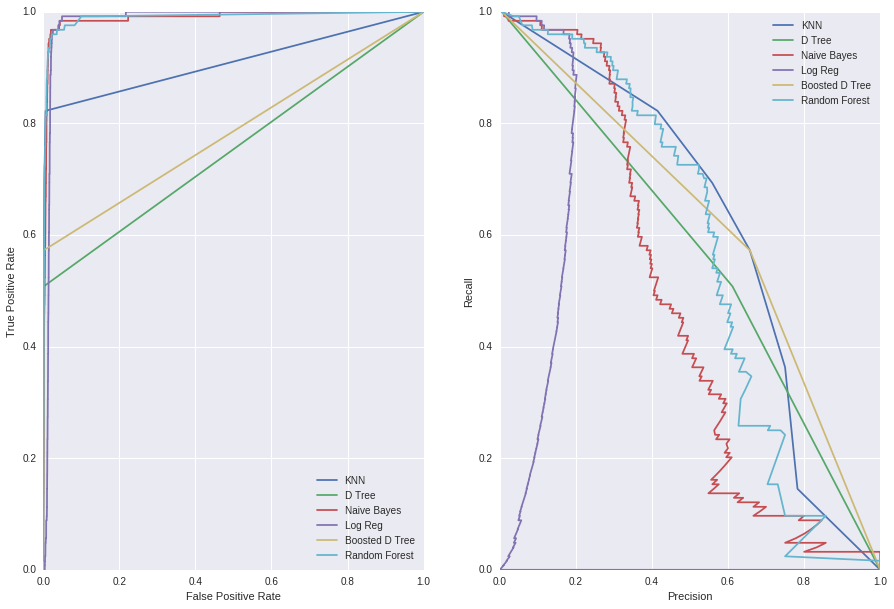

In [17]:
score_df = run_models(colors_train, labels_train, colors_test, labels_test)
print score_df

##Adding new data of RR Stars with KDE

In [18]:
rr_stars = stacked[stacked[:, 4] == 1][:, :-1]

##Optimize KDE with a Gridsearch

In [19]:
stacked[:, :-1].shape

(93141, 4)

In [20]:
params = {'bandwidth': np.logspace(-2, 2, 200)}
grid_kde = GridSearchCV(KernelDensity(), params)
#grid_kde.fit(rr_stars)
grid_kde.fit(rr_stars)

print("best bandwidth: {0}".format(grid_kde.best_estimator_.bandwidth))

# use the best estimator to compute the kernel density estimate
kde = grid_kde.best_estimator_

best bandwidth: 0.0191164407539


##Sample New data

In [21]:
sampled_rr_stars = kde.sample(450, random_state=0)

In [22]:
def add_class_to_np_array(arr, cls):
    return np.array([np.concatenate([arr[i], [cls]])for i in xrange(arr.shape[0])])

##Plot the generated RR stars versus the actual stars to test the new KDE data

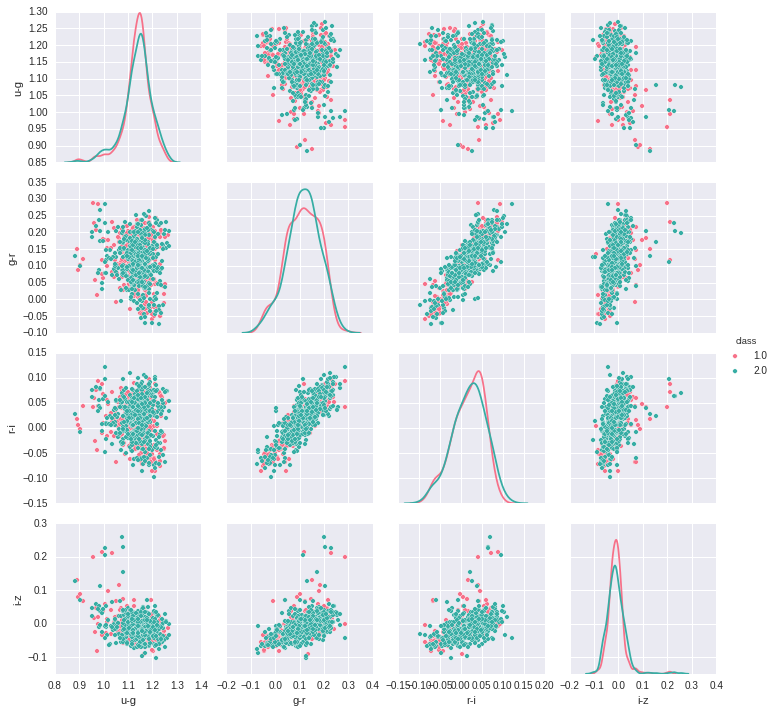

In [23]:
sampled_rr_class = add_class_to_np_array(sampled_rr_stars, 2)
rr_stack = np.vstack([add_class_to_np_array(rr_stars, 1), sampled_rr_class])
rr_df = pd.DataFrame(rr_stack, columns=col_names)
sns.pairplot(rr_df, hue='class', vars=col_names[:-1], diag_kind="kde", palette='husl')

##Plot the new sampled RR stars with the original data

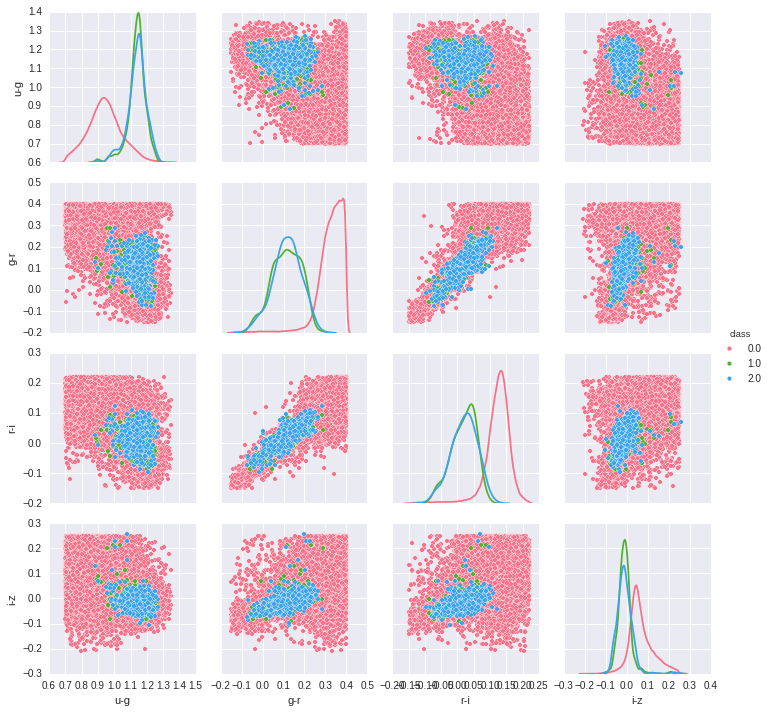

In [24]:
new_data_stack = np.vstack([stacked, sampled_rr_class])
new_data_df = pd.DataFrame(new_data_stack, columns=col_names)
sns.pairplot(new_data_df, hue='class', vars=col_names[:-1], diag_kind="kde", palette='husl')

## Test results with varying amout of kde data

In [25]:
amount_of_new_data = np.arange(1000, 30000, 5000)

In [26]:
def create_added_data_set(amount_new):
    new_rr_stars = kde.sample(amount_new, random_state=0)
    new_rr_with_class = add_class_to_np_array(new_rr_stars, 1)
    new_data = np.vstack([stacked, new_rr_with_class])
    return new_data[:, :-1], new_data[:, -1]


In [ ]:
def plot_scores(amount_of_data, score_frames, score_type):
    models = score_frames[0].index
    model_dict = {}
    for m in models:
        model_dict[m] = []
        for df in score_frames:
            model_dict[m].append(df[score_type][m])

    for k, v in model_dict.items():
        plt.plot(amount_of_data, v, label=k, marker='o', linestyle='-')
    plt.legend(loc='lower right')
    plt.xlabel('Amount of new data')
    plt.ylabel(score_type)

In [ ]:
score_frames = [score_df]
for rr_new in amount_of_new_data:
    new_colors, new_labels = create_added_data_set(rr_new)
    colors_train_n, colors_test_n, labels_train_n, labels_test_n = train_test_split(new_colors, new_labels, 
                                                                                    test_size=0.25, random_state=13)
    
    score_df = run_models(colors_train_n, labels_train_n, colors_test, labels_test)
    score_frames.append(score_df)
    
    print 'Amount of Sampled RR Stars', rr_new
    #print score_df
    
    plt.figure()
    


amount_of_data = np.concatenate([[0], amount_of_new_data])
plot_scores(amount_of_data, score_frames, 'recall')
plt.figure()
plot_scores(amount_of_data, score_frames, 'precision')
plt.figure()
plot_scores(amount_of_data, score_frames, 'F1')
plt.figure()
plot_scores(amount_of_data, score_frames, 'ROC_AUC')
plt.figure()
plot_scores(amount_of_data, score_frames, 'Accuracy')

In [ ]:
score_frames = [score_df]
n_rr_train = colors_train[labels_train == 1].shape[0]
for rr_new in amount_of_new_data:
    
    # Randomly select which RR Lyrae stars to include as duplicates
    c = np.random.choice(n_rr_train, rr_new)
    colors_train_new = np.vstack([colors_train, colors_train[labels_train == 1][c]])
    labels_train_new = np.hstack([labels_train, labels_train[labels_train == 1][c]])
    
    tr_size = labels_train_new.shape[0]
    p = np.random.permutation(tr_size)
    
    #Shuffle the training data
    colors_train_n = colors_train_new[p]
    labels_train_n = labels_train_new[p]
    
    score_df = run_models(colors_train_n, labels_train_n, colors_test, labels_test)
    score_frames.append(score_df)
    
    print 'Amount of Reused RR Stars', rr_new
    #print score_df
    
    plt.figure()
    


amount_of_data = np.concatenate([[0], amount_of_new_data])
print amount_of_data
plot_scores(amount_of_data, score_frames, 'recall')
plt.figure()
plot_scores(amount_of_data, score_frames, 'precision')
plt.figure()
plot_scores(amount_of_data, score_frames, 'F1')
plt.figure()
plot_scores(amount_of_data, score_frames, 'ROC_AUC')
plt.figure()
plot_scores(amount_of_data, score_frames, 'Accuracy')

In [ ]:
import IPython

In [ ]:
IPython.__version__